Multiple simple model based on the depression-data-set:

Idea: We have a basic dataset, which is given in: https://www.kaggle.com/datasets/shahzadahmad0402/depression-and-anxiety-data


We deal with 4 different target-columns:

1.) anxiousness:  Prediction:  0: False (no anxious) / 1: True (anxious)
2.) depressiveness: Prediction: 0: False (no depression) / 1: True (depression)
3.) will_get_treatment: Prediction: 0: False (no get-treatement) / 1: True (get-treatment)
4.) suicidality: Prediction: 0: False (no suicidality) / 1: True (suicidality)

We apply a multiple depression model, which is done in the kaggle-work: https://www.kaggle.com/code/geovaniwoll/machine-learningproject 
We classify the target depressiveness, with the three columns (features): gender, phq_score, gad_score,
see also the given description of the dataset, above and given in the Kaggle_work: https://www.kaggle.com/datasets/shahzadahmad0402/depression-and-anxiety-data

| **Column** | **Description** |
| ------------ | :-----------------: |
| id | each number is a participant in the experiment |
| school_year | years in school |
| age | |
| gender | |
| bmi | body mass index |
| who_bmi | bmi category |
| phq_score | measure the severity of symptoms related to depression, anxiety, and other related disorders in patients |
| depression_severity | degree or intensity of symptoms experienced by an individual with depression |
| depressiveness | |
| suicidal | the candidate have suicide thought |
| depression_diagnosis | the candidate already have depression diagnosis |
| depression_treatment | the candidate already have depression treatment |
| gad_score | measure that assesses the severity of Generalized Anxiety Disorder |
| anxiety_severity |  intensity of symptoms experienced by an individual with anxiety |
| anxiousness | |
| anxiety_diagnosis | the candidate already have anxiety diagnosis |
| anxiety_treatment | the candidate already have anxiety treatment |
| epworth_score |  score to assess daytime sleepiness ytime sleepiness |
| sleepiness | |

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

In [2]:
# Read the csv-data
df = pd.read_csv('data/depression_anxiety_data.csv')

In [4]:
# see the data
df.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [5]:
print("\nData-Types of the columns:")
display(df.dtypes)


Data-Types of the columns:


id                        int64
school_year               int64
age                       int64
gender                   object
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
depressiveness           object
suicidal                 object
depression_diagnosis     object
depression_treatment     object
gad_score                 int64
anxiety_severity         object
anxiousness              object
anxiety_diagnosis        object
anxiety_treatment        object
epworth_score           float64
sleepiness               object
dtype: object

In [6]:
#check NaNs and duplicates
print('Index')
print('index_size', df.index.size)
print('Columns with NaN')
print('is NaN', df.isna().sum())
print('Duplicates in Columns')
print('duplicated', df.duplicated().sum())
#note: no NaNs, no duplicates, no cleaning required

Index
index_size 783
Columns with NaN
is NaN id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64
Duplicates in Columns
duplicated 0


In [7]:
# Data-cleaning

# Drop all NaNs (we have ony a few NaNs in the columns): 
df = df.dropna()


# Correct Datatypes of the target:
# and the feature gender (both int)

df.gender = df.gender.map({'male':1, 'female':0})


# Define the targets:
#1.) anxiousness:  Prediction:  0: False (no anxious) / 1: True (anxious)
#2.) depressiveness: Prediction: 0: False (no depression) / 1: True (depression)
#3.) will_get_treatment: Prediction: 0: False (no get-treatement) / 1: True (get-treatment)
#4.) suicidality: Prediction: 0: False (no suicidality) / 1: True (suicidality)

df['anxiousness'] = df['anxiousness'].astype(int)
df['depressiveness'] = df['depressiveness'].astype(int)

df['treatment_status'] = df['depression_treatment'] | df['anxiety_treatment']
df['treatment_status'] = df['treatment_status'].astype(int)


df['suicidal'] = df['suicidal'].astype(int)


display(df.head())


,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,treatment_status
0,1,1,19,1,33.333333,Class I Obesity,9,Mild,0,0,False,False,11,Moderate,1,False,False,7.0,False,0
1,2,1,18,1,19.841270,Normal,8,Mild,0,0,False,False,5,Mild,0,False,False,14.0,True,0
2,3,1,19,1,25.102391,Overweight,8,Mild,0,0,False,False,6,Mild,0,False,False,6.0,False,0
3,4,1,18,0,23.738662,Normal,19,Moderately severe,1,1,False,False,15,Severe,1,False,False,11.0,True,0
4,5,1,18,1,25.617284,Overweight,6,Mild,0,0,False,False,14,Moderate,1,False,False,3.0,False,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 0 to 782
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    765 non-null    int64  
 1   school_year           765 non-null    int64  
 2   age                   765 non-null    int64  
 3   gender                765 non-null    int64  
 4   bmi                   765 non-null    float64
 5   who_bmi               765 non-null    object 
 6   phq_score             765 non-null    int64  
 7   depression_severity   765 non-null    object 
 8   depressiveness        765 non-null    int32  
 9   suicidal              765 non-null    int32  
 10  depression_diagnosis  765 non-null    object 
 11  depression_treatment  765 non-null    object 
 12  gad_score             765 non-null    int64  
 13  anxiety_severity      765 non-null    object 
 14  anxiousness           765 non-null    int32  
 15  anxiety_diagnosis     765 no

**Most important features, given by the clinical test:**
- gender
- phd_score
- gad_score

             gender  phq_score  gad_score
gender     1.000000  -0.148067  -0.225399
phq_score -0.148067   1.000000   0.679968
gad_score -0.225399   0.679968   1.000000


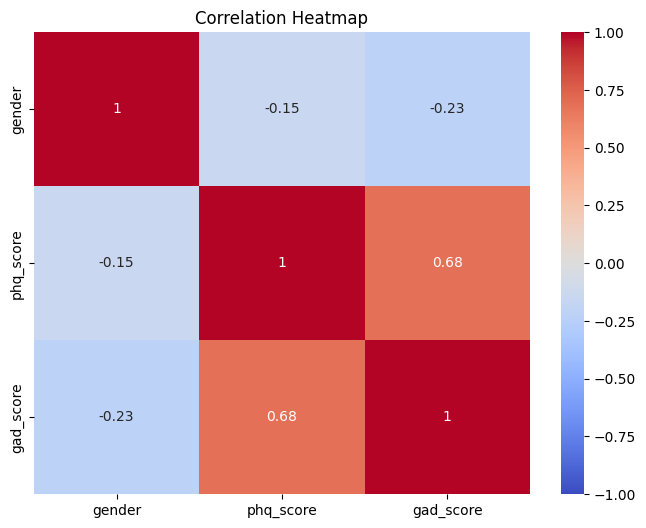

In [9]:
# correlation of the three important features:  gender, gad_score, phq_score 

correlation_matrix = df[['gender', 'phq_score', 'gad_score']].corr()
print(correlation_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

**Exploration of the dataset with the important features**

We apply sns-plots

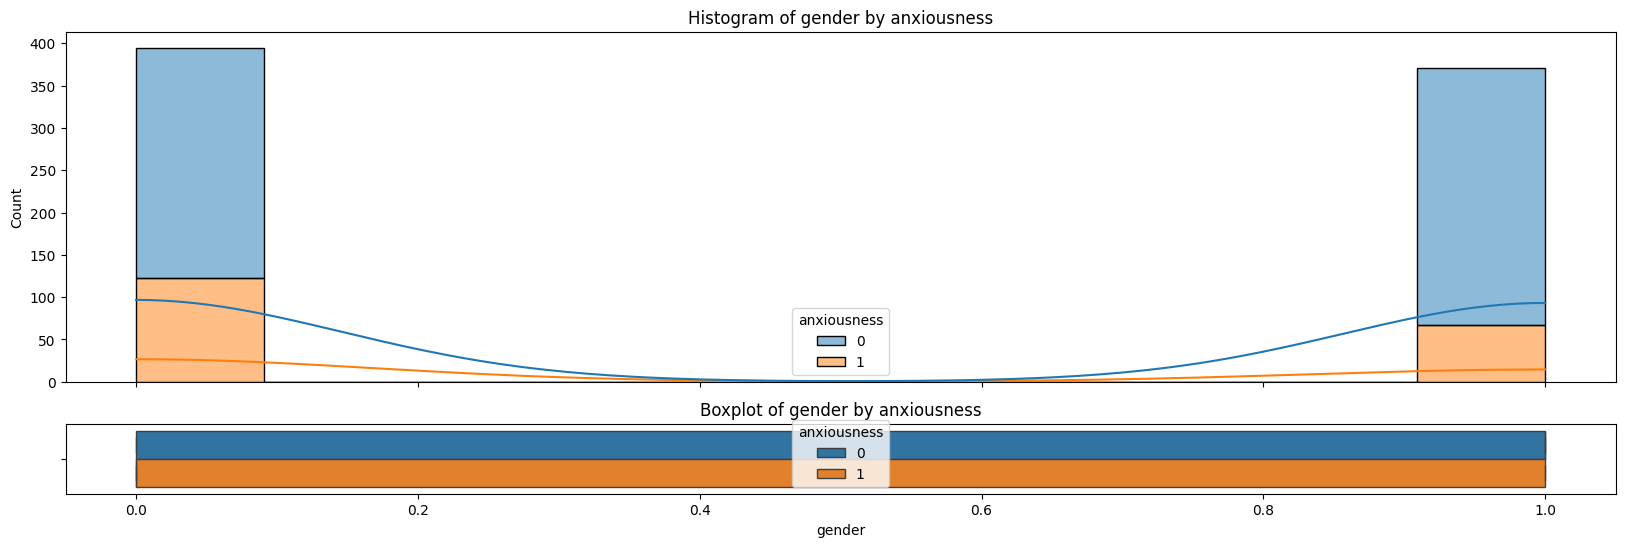

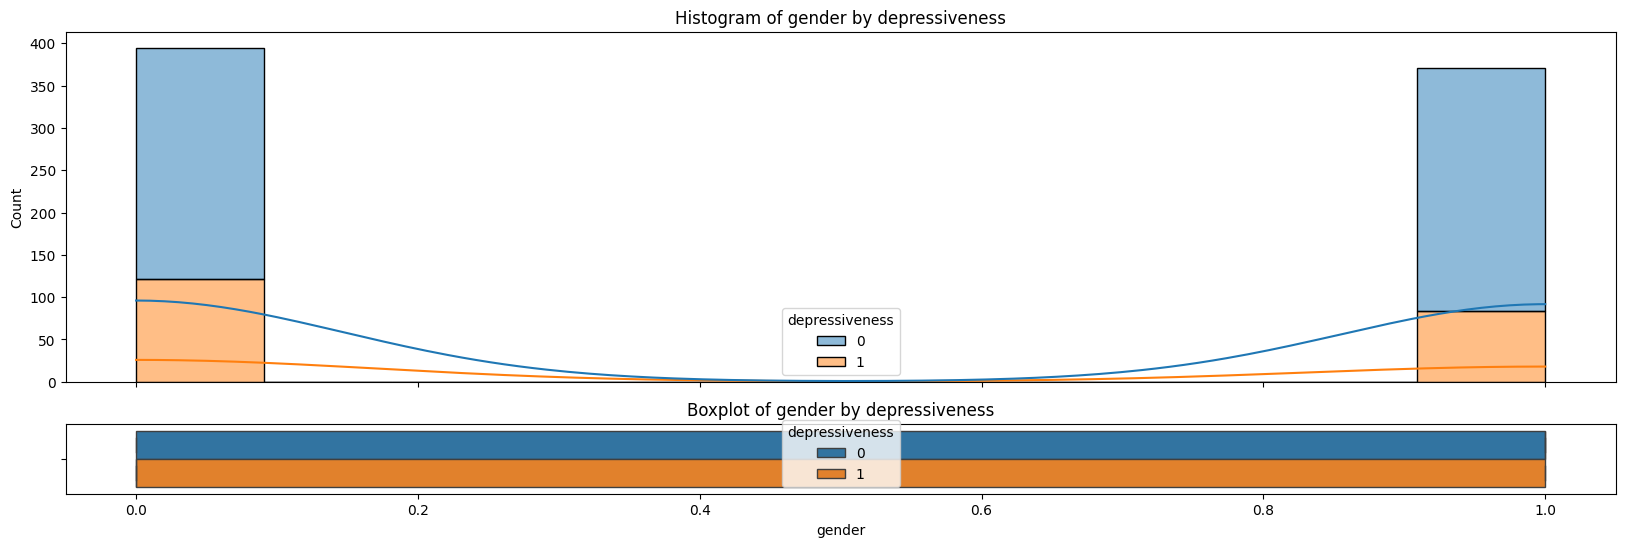

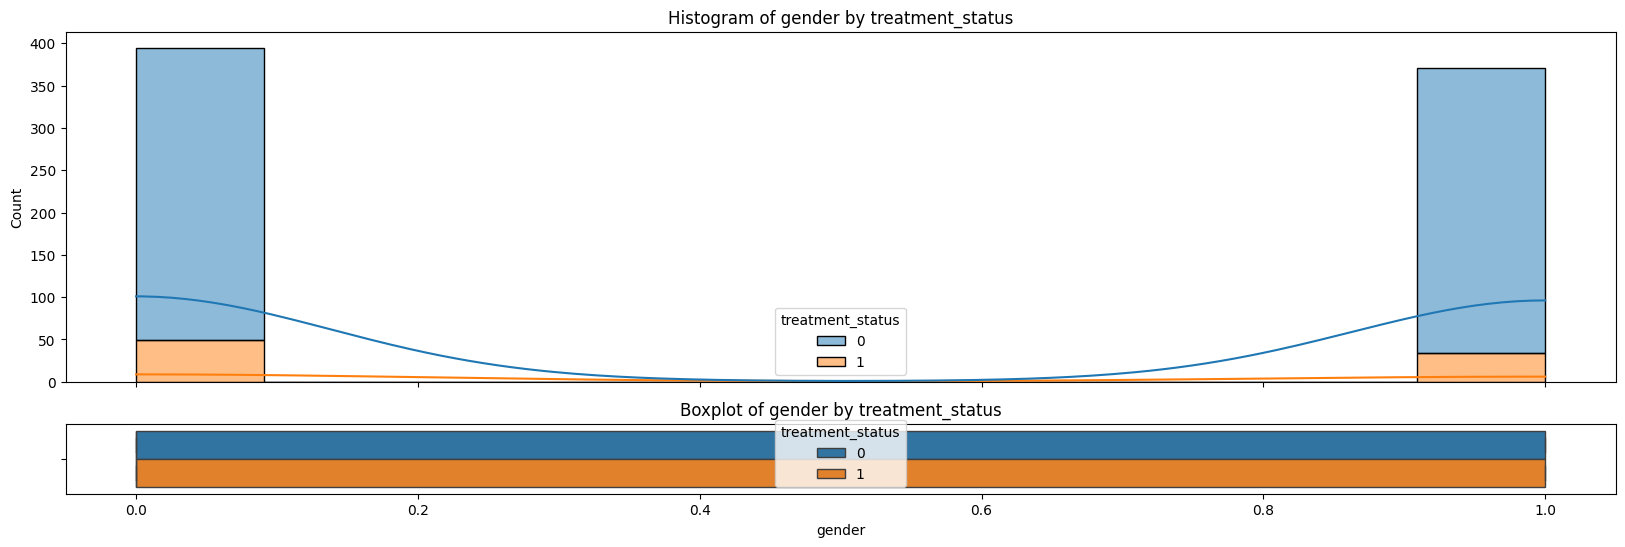

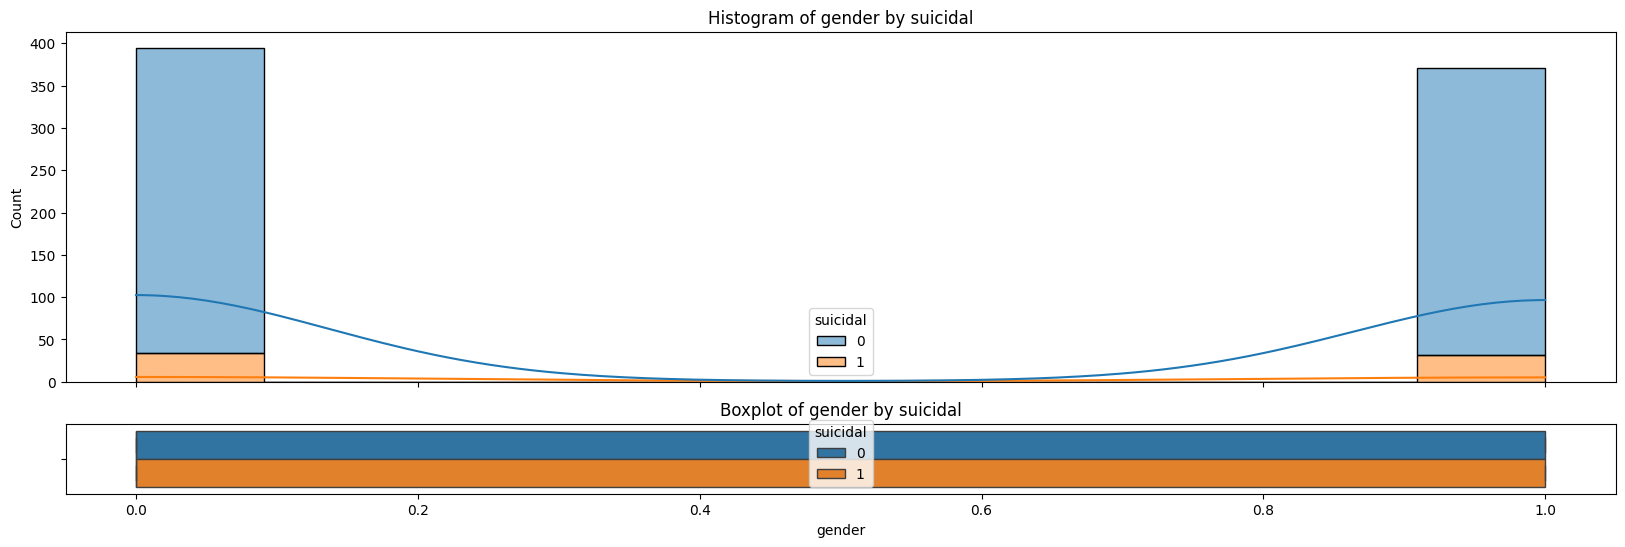

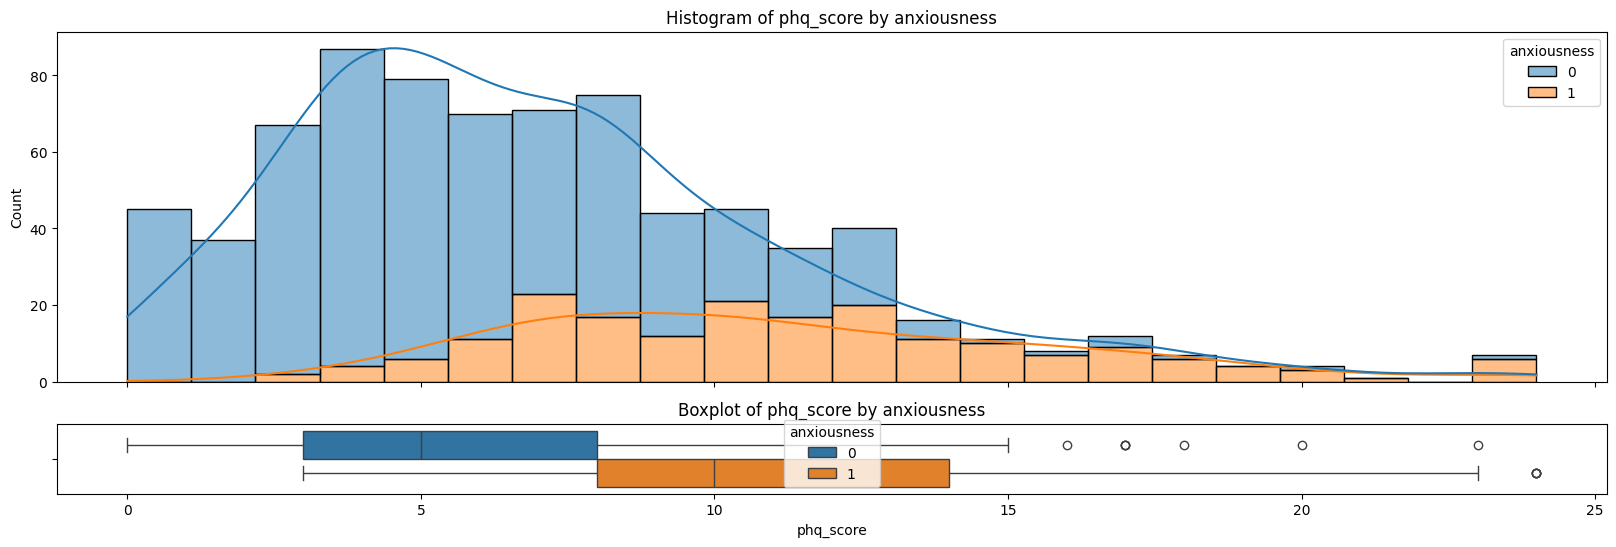

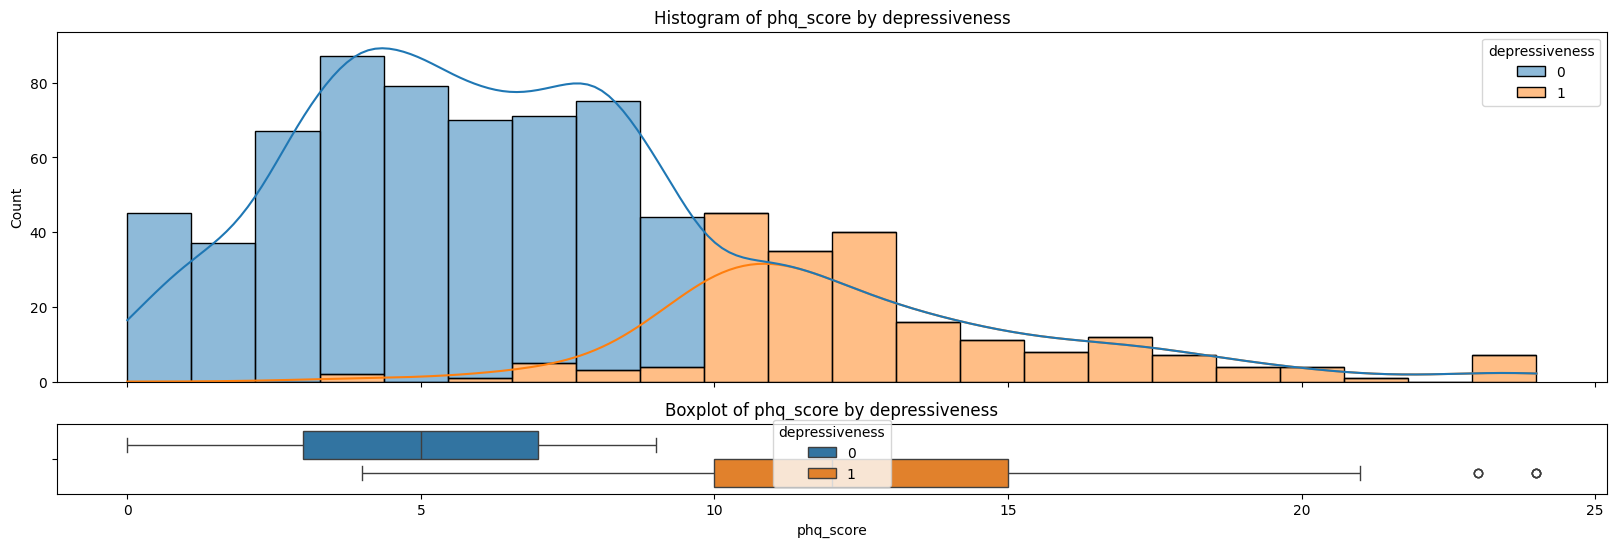

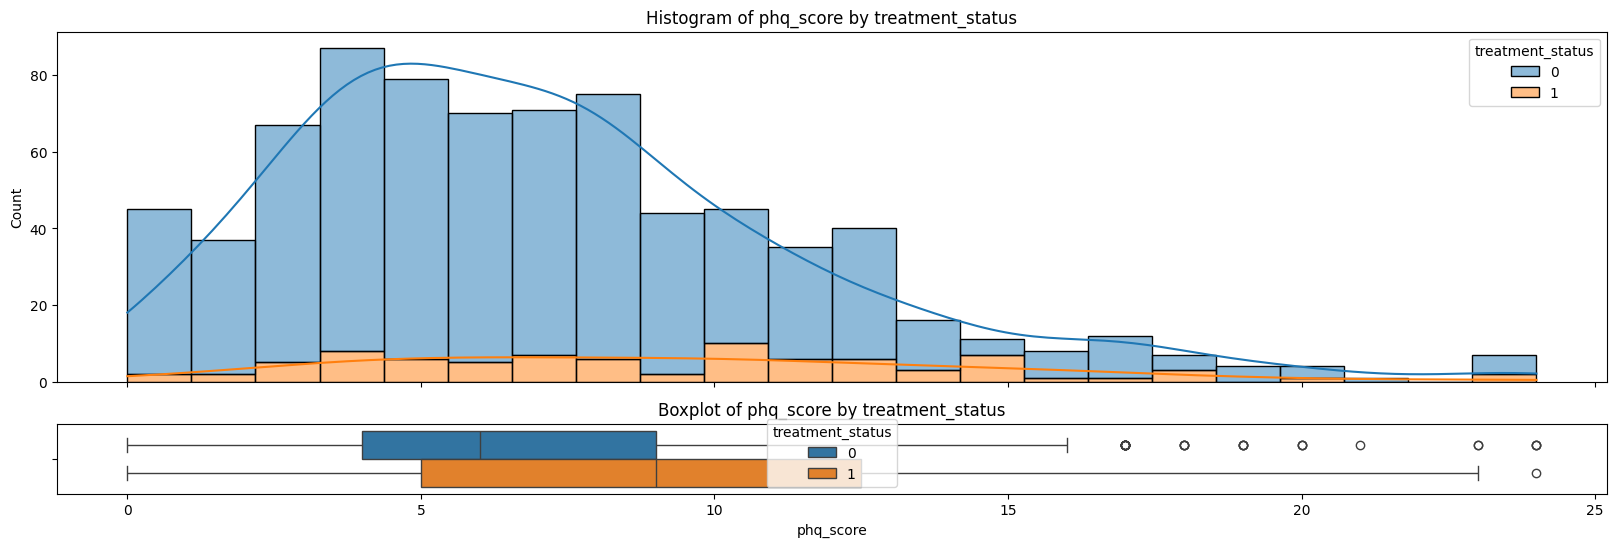

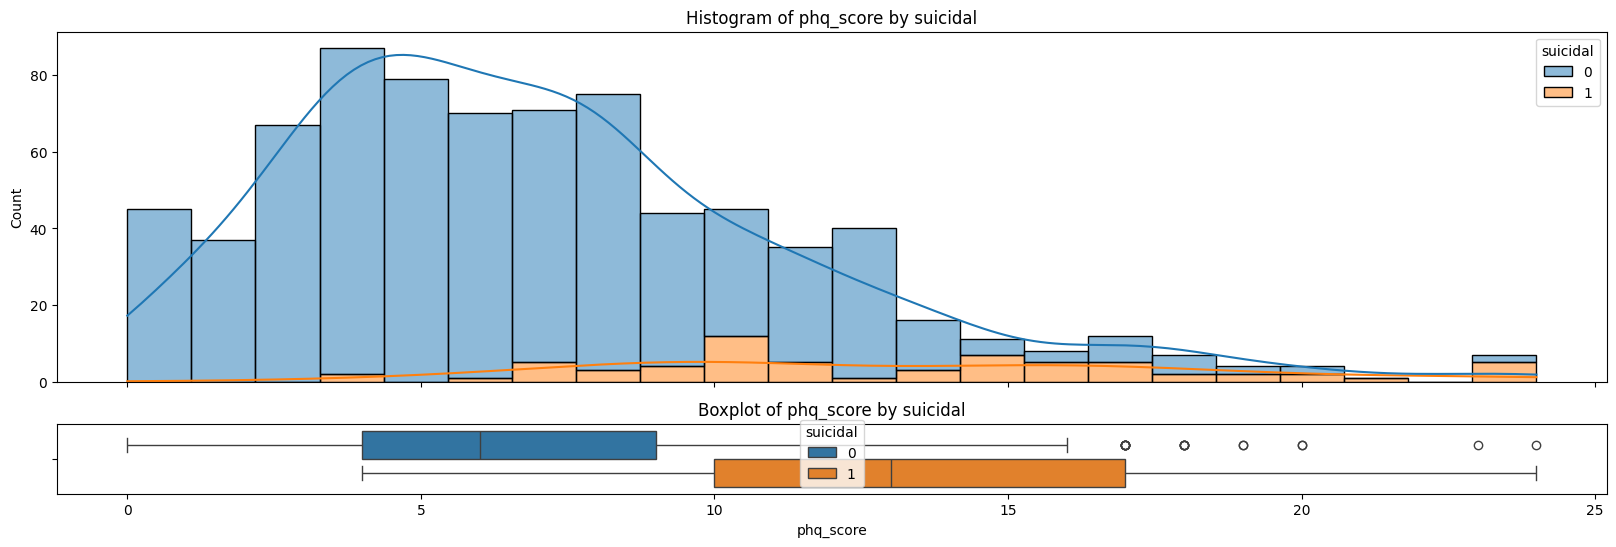

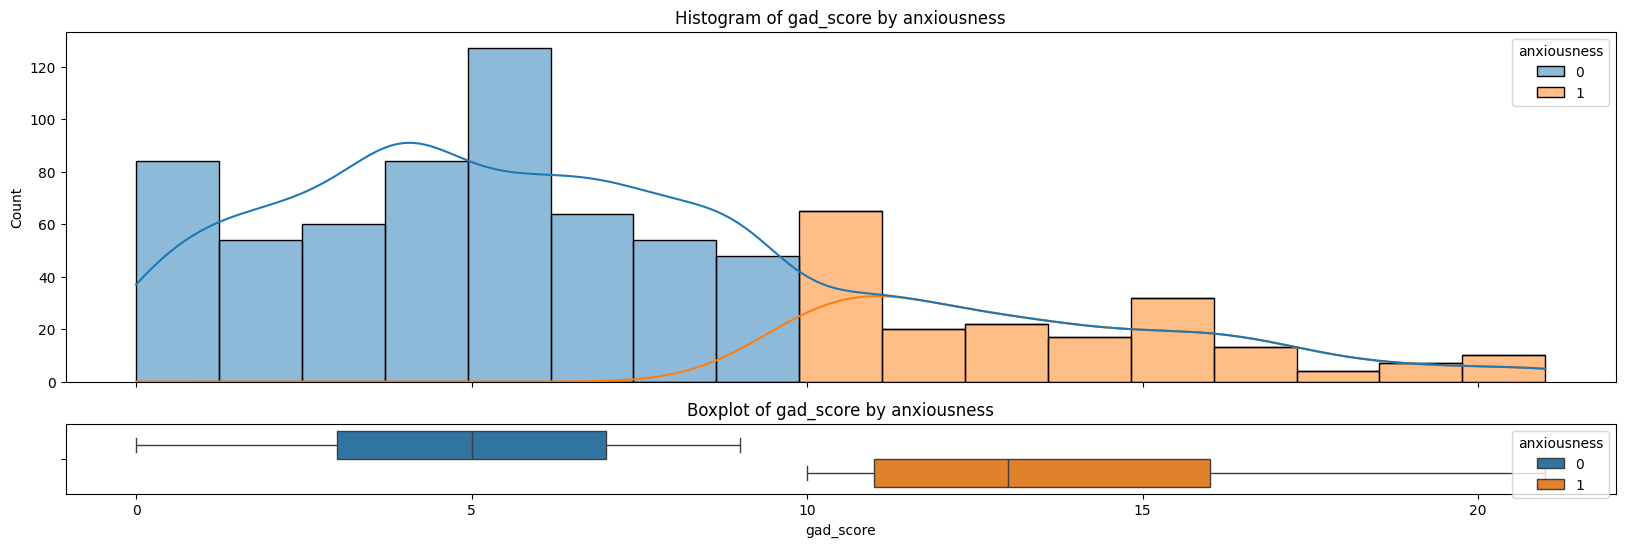

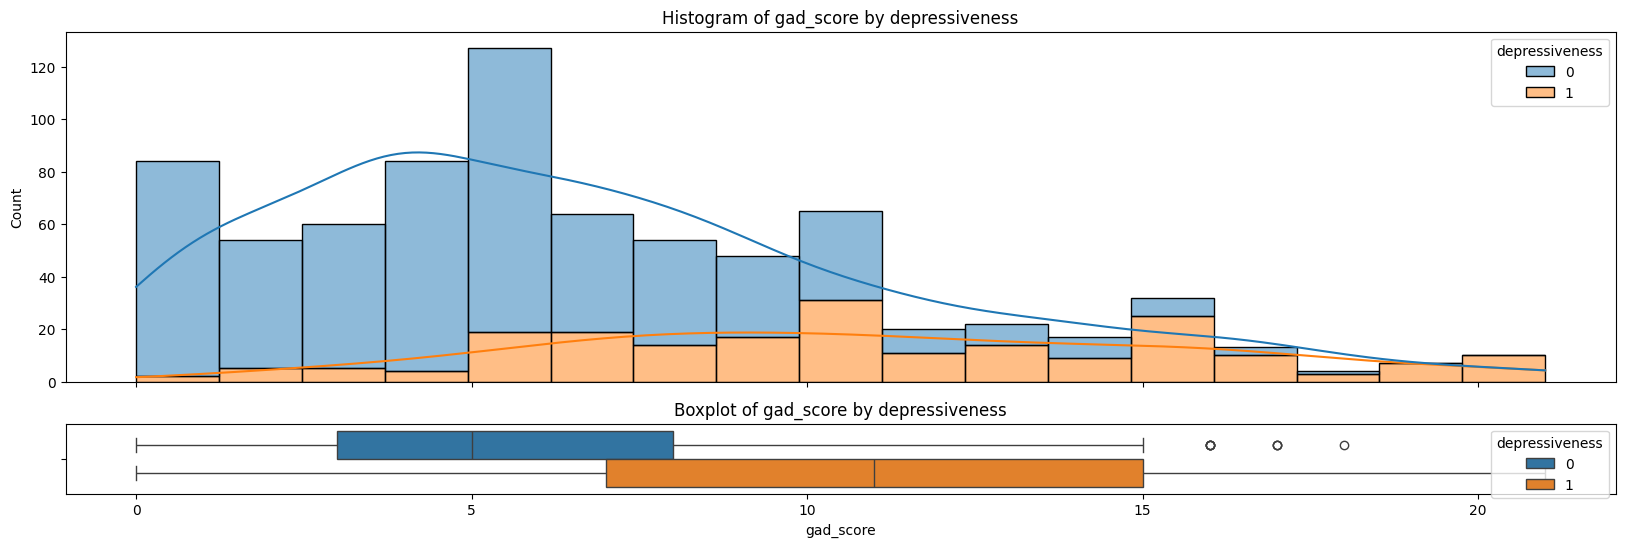

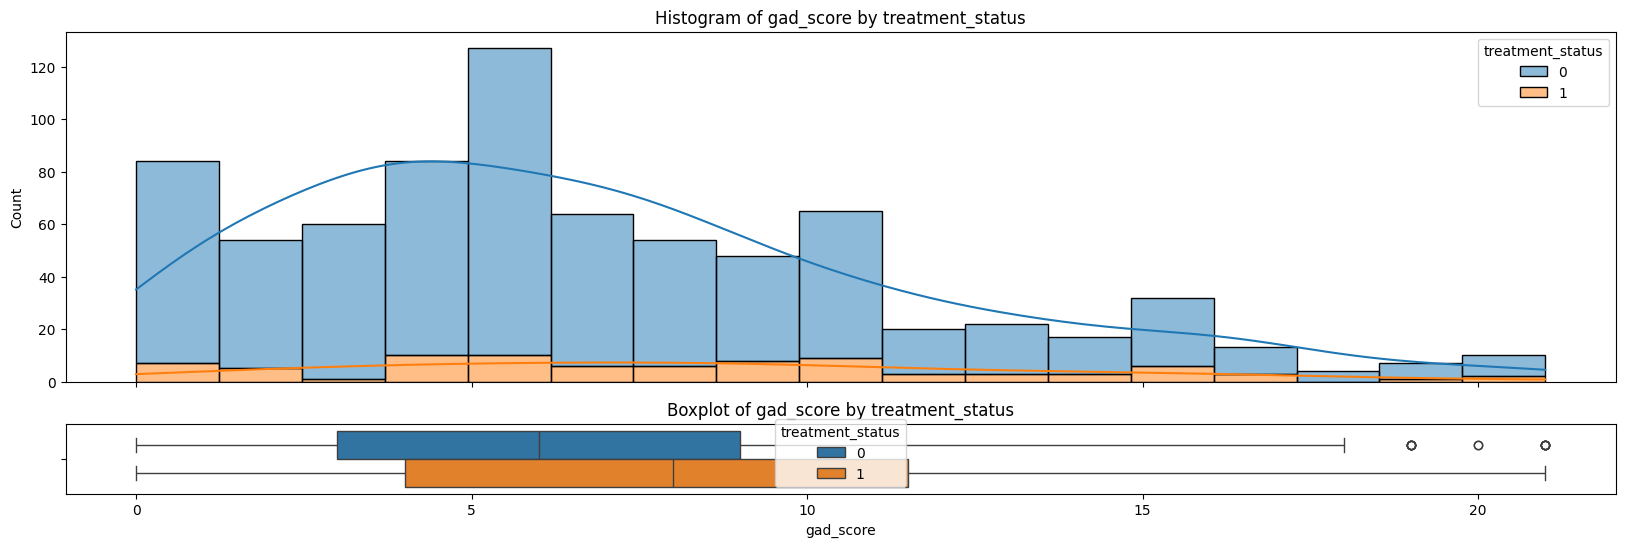

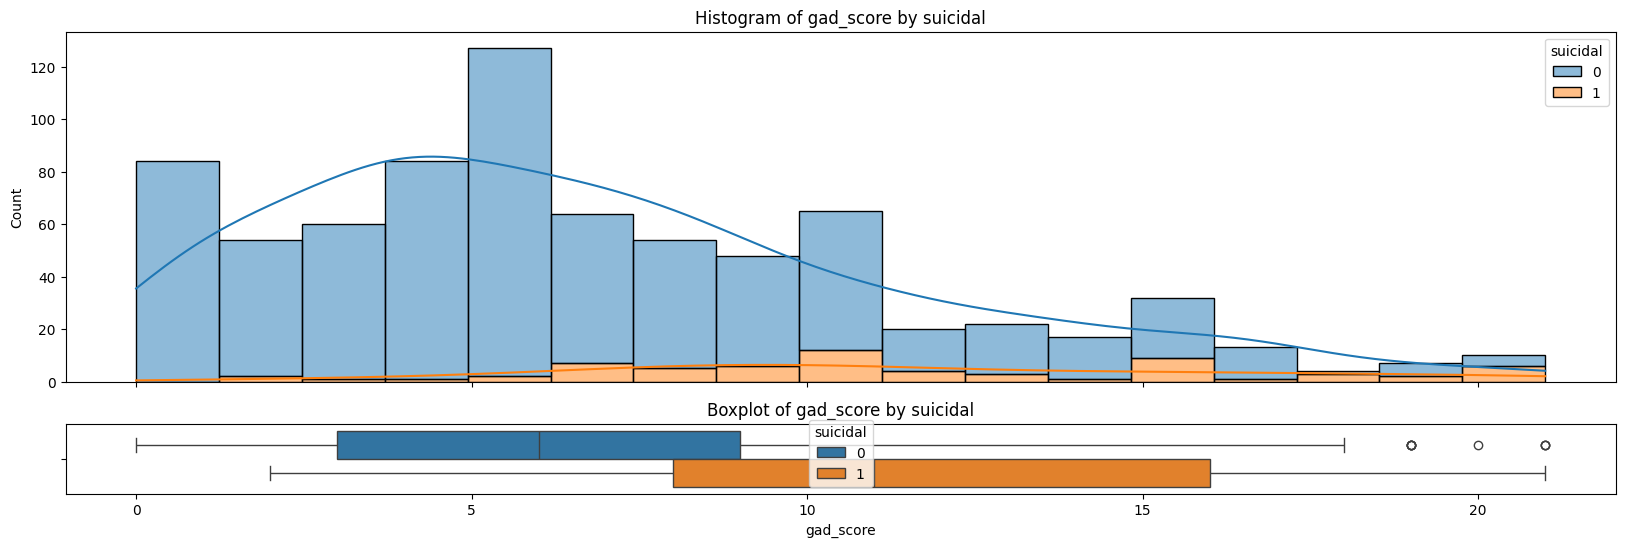

In [11]:


# Define your target and numerical columns
target_cols = ['anxiousness', 'depressiveness', 'treatment_status', 'suicidal']
num_cols = ['gender', 'phq_score', 'gad_score']

# Iterate over each numerical column
for num_col in num_cols:
    # Iterate over each target column
    for target_col in target_cols:
        # Create the figure and axes for the plots
        fig, axes = plt.subplots(2, 1, figsize=(20, 6), sharex=True, gridspec_kw={'height_ratios': [5, 1]})
        
        # Histogram
        sns.histplot(data=df, x=num_col, hue=target_col, kde=True, multiple="stack", ax=axes[0])
        axes[0].set_title(f'Histogram of {num_col} by {target_col}')
        
        # Boxplot
        sns.boxplot(data=df, x=num_col, hue=target_col, ax=axes[1])
        axes[1].set_title(f'Boxplot of {num_col} by {target_col}')
        
        # Titles of the axes and display the plot
        axes[1].set_xlabel(num_col)
        axes[1].set_ylabel('')
        plt.show()


* Base model with the training and test datasets of all the 4 different targets

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define your target and numerical columns
target_cols = ['anxiousness', 'depressiveness', 'treatment_status', 'suicidal']

# Important features
X = df[['phq_score', 'gad_score', 'gender']]

# Initialize an empty list to store the models
models = []

# Iterate over each target column
for target in target_cols:
    y = df[target]
    
    # Split the train and test dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply a simple logistic regression model
    model = LogisticRegression()
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Append the fitted model to the list
    models.append(model)
    
    # Predict the model
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {target}: {accuracy}")
    
    # Apply a first prediction
    print(f"Classification report for {target}:\n{classification_report(y_test, y_pred)}")

# The models list now contains the fitted models for each target
# models[0] -> model for 'anxiousness'
# models[1] -> model for 'depressiveness'
# models[2] -> model for 'treatment_status'
# models[3] -> model for 'suicidal'


Accuracy for anxiousness: 1.0
Classification report for anxiousness:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00        29

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153

Accuracy for depressiveness: 0.9869281045751634
Classification report for depressiveness:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       124
           1       1.00      0.93      0.96        29

    accuracy                           0.99       153
   macro avg       0.99      0.97      0.98       153
weighted avg       0.99      0.99      0.99       153

Accuracy for treatment_status: 0.8627450980392157
Classification report for treatment_status:
              precision    recall  f1-score   support

           0       0.86      1.00     

C:\Users\Trainee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Trainee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Trainee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi

In [15]:
# prediction with the different targets

target_cols = ['anxiousness', 'depressiveness', 'treatment_status', 'suicidal']

# The models list now contains the fitted models for each target
# models[0] -> model for 'anxiousness'  -> angious
# models[1] -> model for 'depressiveness' -> depressive
# models[2] -> model for 'treatment_status'  -> treatment
# models[3] -> model for 'suicidal'   -> suicide
#  Example aim-file


import pandas as pd



# Define the status names for each model
status_names = {
    'anxiousness': ['non-anxious', 'anxious'],
    'depressiveness': ['non-depressive', 'depressive'],
    'treatment_status': ['not in treatment', 'in treatment'],
    'suicidal': ['non-suicidal', 'suicidal']
}

# Reading the CSV file into a DataFrame
X_aim = pd.read_csv('aim_test.csv')

# Ensure X_aim has the same features as used for training
X_aim = X_aim[['phq_score', 'gad_score', 'gender']]

# Iterate over the models and predict for each target
for i, target in enumerate(target_cols):
    y_pred_aim = models[i].predict(X_aim)
    print(f"Predictions for {target}:")
    print(y_pred_aim)
    
    # Format the predictions for better readability
    for j, prediction in enumerate(y_pred_aim, start=1):
        status = status_names[target][prediction]
        print(f'person{j} is {status}')


Predictions for anxiousness:
[1 0 0 0]
person1 is anxious
person2 is non-anxious
person3 is non-anxious
person4 is non-anxious
Predictions for depressiveness:
[0 0 1 1]
person1 is non-depressive
person2 is non-depressive
person3 is depressive
person4 is depressive
Predictions for treatment_status:
[0 0 0 0]
person1 is not in treatment
person2 is not in treatment
person3 is not in treatment
person4 is not in treatment
Predictions for suicidal:
[0 0 0 0]
person1 is non-suicidal
person2 is non-suicidal
person3 is non-suicidal
person4 is non-suicidal


In [ ]:
# go on to the next step!!!

# with the resampled model

In [ ]:



# Define your target and numerical columns
target_cols = ['anxiousness', 'depressiveness', 'treatment_status', 'suicidal']

# num_cols = ['gender', 'phq_score', 'gad_score']


# Important features and the target 
X = df[['phq_score', 'gad_score', 'gender']]
y = df['depressiveness']


# Split the train and test data-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply a simple logist model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the mode
y_pred = model.predict(X_test)

# Calcuate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Apply a first prediction
print(classification_report(y_test, y_pred))

Improvement of the model, via oversampling to balance the target

In [ ]:
data_majority = df[df['depressiveness'] == 0]
data_minority = df[df['depressiveness'] == 1]


In [ ]:
data_minority_oversampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=42)


In [ ]:
df_oversampled = pd.concat([data_majority, data_minority_oversampled])


In [ ]:
# Improvement of with the oversampled dataset

X = df_oversampled[['phq_score', 'gad_score', 'gender']]
y = df_oversampled['depressiveness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction of the model
y_pred = model.predict(X_test)
print(X_test)
print(y_pred)

# Accuray and classification report
print("Accuracy:", model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

**Final predictions with an own or given dataset: aim_test.csv**

In [ ]:
# Idea of an app interface:

# We have the following questiond:
# phq_score: measure the severity of symptoms related to depression, anxiety, and other related disorders in patients: between 0 and 24
# gad_score: measure that assesses the severit of generalised anxity disorder:  between 0 and 21
# gender:  0 for female / 1 for male

# Ask the questions to the students/childs and the predict if they are depressive or not


#  Example aim-file


# Reading the CSV file into a DataFrame
X_aim = pd.read_csv('aim_test.csv')

y_pred_aim = model.predict(X_aim)
print(X_aim)
print(y_pred_aim)

# 0 is not depressive
# 1 is depressiv

* We apply a simplified depression model, which are based on the three important feature: gander, phq_score and gad_score.
We could apply a logistic regression model for the classification and obtain good clasifiactions.
Based on the fitted model we apply the predictio to an own data set.
Such a simple model culd be used as a first classification of depressiveness.*




In [ ]:
import pickle
import pandas as pd

# Angenommen, 'model' ist dein trainiertes Modell
# Speichere das Modell in einer Datei
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
